# MGTF 495: Project Part 1
# Housing Sale Price Prediction

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown --id 13yU822Ba1ZblG7L1MKOzCzYkVAZeZRa8
!gdown --id 1pe6B2WNqOKVYv26hRZVwwXJQVtVCcbA1

In [ ]:
train = pd.read_csv('train_new.csv')
test = pd.read_csv('test_new.csv')

In [ ]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['ID']
test_ID = test['ID']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("ID", axis = 1, inplace = True)
test.drop("ID", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (2051, 81) 
The test data size before dropping Id feature is : (879, 80) 

The train data size after dropping Id feature is : (2051, 80) 
The test data size after dropping Id feature is : (879, 79) 


In [ ]:
def rmse(y_true, y_pred):
    """Root Mean Squared Error"""
    return np.sqrt(mean_squared_error(y_true, y_pred))

### Label Log

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


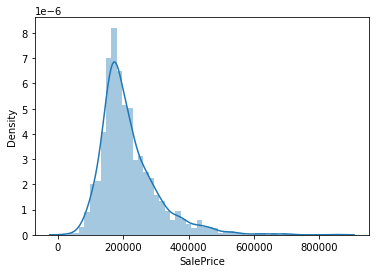

In [ ]:
sns.distplot(train['SalePrice'])

In [ ]:
train['SalePrice'] = np.log(train['SalePrice'])

## Data Preparation 
### Analyze and preprocess the data
` num: drop features according to the correlation with Saleprice`
` text: analyze and delete`

In [ ]:
features = train.iloc[:,:-1]

n_train = features.shape[0]
n_train
n_test = test.shape[0]
n_test

879

#### Drop the outliers

In [ ]:
nums=train.dtypes[train.dtypes !='object'].index
train[nums].describe()

,BsmtUnfinishedArea,LivingArea,HalfBaths,LotFrontage,YearRemodelled,MasVnrArea,EnclosedPorchArea,PoolSize,BsmtFullBaths,ScreenPorchArea,...,GarageArea,BsmtFinish1Area,Quality,LotSize,Kitchens,GarageYearBuilt,BuildingClass,2ndFloorArea,1stFloorArea,SalePrice
count,2051.000000,2051.000000,2051.000000,1708.000000,2051.000000,2036.000000,2051.000000,2051.000000,2051.000000,2051.000000,...,2050.000000,2051.000000,2051.000000,2051.00000,2051.000000,1937.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,713.812287,1491.158459,0.375427,68.957260,1983.921502,98.312377,23.281326,1.682594,0.433447,15.856168,...,471.782439,485.005851,6.062896,10149.16626,1.042418,1977.805885,56.969771,572.461726,2202.971234,12.213050
std,468.128294,505.773176,0.502152,23.690049,21.038876,175.675222,61.154577,30.620943,0.530837,55.909712,...,217.014929,482.990709,1.423305,8408.22880,0.211048,26.017467,42.241709,429.773669,390.303146,0.369913
min,0.000000,407.000000,0.000000,21.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1300.00000,0.000000,1895.000000,20.000000,0.000000,1416.000000,10.386346
25%,351.000000,1121.500000,0.000000,58.000000,1964.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,319.000000,0.000000,5.000000,7447.50000,1.000000,1960.000000,20.000000,252.000000,1918.000000,11.986772
50%,613.000000,1432.000000,0.000000,67.500000,1993.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,480.000000,433.000000,6.000000,9375.00000,1.000000,1979.000000,50.000000,252.000000,2132.000000,12.175010
75%,993.000000,1734.000000,1.000000,80.000000,2004.000000,158.750000,0.000000,0.000000,1.000000,0.000000,...,576.000000,798.000000,7.000000,11402.00000,1.000000,2002.000000,70.000000,941.500000,2418.500000,12.440057
max,2360.000000,5642.000000,2.000000,313.000000,2010.000000,1600.000000,552.000000,738.000000,3.000000,576.000000,...,1488.000000,5708.000000,10.000000,215245.00000,3.000000,2207.000000,190.000000,2124.000000,6139.000000,13.651836


In [ ]:
train.drop(train[(train['LivingArea']>4000) & (train['SalePrice']<200000)].index,inplace=True)

In [ ]:
all_features=pd.concat((train,test))
all_features.drop(['SalePrice'],axis=1, inplace=True)

#### Fill Nans

1. text: fill 'No' or 'None' or mode()

2. numeric: fill 0 or mean()

In [ ]:
# np.sum(all_features.isna())
text = all_features.dtypes[all_features.dtypes =='object'].index

t = []
for i in features[text].columns:
    t.append(features[text][i].describe()['top'])
    
top_text = pd.DataFrame([features[text].columns,t]).transpose()

no_text = []

for i in range(len(top_text)):
    if top_text.iloc[i,1] == 'No':
        no_text.append(top_text.iloc[i,0])

print(no_text)

all_features[no_text] = all_features[no_text].fillna('No')

missing = np.sum(all_features[text].isna()).sort_values(ascending = False)
nas = missing[missing >0]
nas.index
print(nas)


all_features['Electrical'] = all_features['Electrical'].fillna(all_features['Electrical'].mode()[0])
nas.drop(['Electrical'])

for i in nas.index:
    all_features[i] = all_features[i].fillna('None')

# np.sum(all_features[txt_features].isna()).sort_values(ascending = False)
# all_features[txt_features].shape

['BsmtExposure']
PoolQuality          2914
Misc Feature         2821
TypeOfAlleyAccess    2728
FenceQuality         2354
FireplaceQuality     1422
GarageQuality         159
GarageCondition       159
GarageFinish          159
GarageType            157
BsmtFinishType2        81
BsmtFinishType1        80
BsmtHeight             80
BsmtCondition          80
MasVnrType             23
Electrical              1
dtype: int64


In [ ]:
num_features=all_features.dtypes[all_features.dtypes !='object'].index
missing_num = all_features[num_features].isna().sum().sort_values(ascending = False)
num_nas = missing_num[missing_num>0]
all_features[num_nas.index]

all_features['LotFrontage'] = all_features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

num_nas.drop(['LotFrontage'])
all_features[num_features]=all_features[num_features].fillna(0)
# np.sum(all_features[num_features].isna())

#### Transform: label encoder

1. transfer float features related to 'year' to string

2. transfer some text features to labels 

In [ ]:
all_features[['YearBuilt','YearRemodelled','GarageYearBuilt','YearSold']] = all_features[['YearBuilt','YearRemodelled','GarageYearBuilt','YearSold']].astype(str)

In [ ]:
#### The unique values and frequencies for text features:

import collections

text = features.dtypes[features.dtypes =='object'].index

frequencyDict = []
for i in features[text].columns:
    frequencyDict.append(list(collections.Counter(features[text][i]).items()))

be = pd.DataFrame(frequencyDict, index = features[text].columns)
be
# be.to_csv('train features.csv')

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
Paved Drive,"(N, 161)","(Y, 1843)","(P, 47)",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
BsmtExposure,"(nan, 55)","(No, 1345)","(Gd, 189)","(Mn, 167)","(Av, 295)",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
ProximityToMainRoad2,"(Norm, 2035)","(Feedr, 9)","(PosN, 2)","(Artery, 1)","(RRNn, 2)","(PosA, 1)","(RRAn, 1)",None,None,None,...,None,None,None,None,None,None,None,None,None,None
KitchenQuality,"(TA, 1062)","(Gd, 791)","(Fa, 53)","(Ex, 145)",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
SaleCondition,"(Normal, 1681)","(Partial, 175)","(Abnorml, 131)","(Alloca, 18)","(Family, 37)","(AdjLand, 9)",None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Lot Config,"(CulDSac, 130)","(Inside, 1496)","(Corner, 356)","(FR2, 59)","(FR3, 10)",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
FenceQuality,"(nan, 1649)","(GdPrv, 88)","(MnPrv, 223)","(MnWw, 10)","(GdWo, 81)",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
SaleType,"(WD, 1772)","(New, 170)","(CWD, 9)","(COD, 61)","(ConLD, 20)","(ConLw, 5)","(Oth, 5)","(ConLI, 6)","(Con, 3)",None,...,None,None,None,None,None,None,None,None,None,None
Neighborhood,"(Edwards, 130)","(NAmes, 328)","(Sawyer, 101)","(CollgCr, 184)","(NridgHt, 117)","(SawyerW, 83)","(Blueste, 8)","(IDOTRR, 70)","(SWISU, 32)","(Greens, 5)",...,"(ClearCr, 33)","(Gilbert, 112)","(NWAmes, 94)","(NPkVill, 17)","(Veenker, 16)","(Somerst, 126)","(Blmngtn, 17)","(MeadowV, 23)","(BrDale, 17)","(GrnHill, 2)"
HeatingQuality,"(Ex, 1042)","(Gd, 343)","(TA, 598)","(Fa, 66)","(Po, 2)",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
from sklearn.preprocessing import LabelEncoder

cols = ['Paved Drive','BsmtExposure','Foundation','GarageFinish','Functional', 'Shape','Central Air',
            'FenceQuality','BsmtFinishType1','BsmtFinishType2','PoolQuality','TypeOfAlleyAccess','TypeOfRoadAccess',
            'KitchenQuality','HeatingQuality','ExteriorQual','BsmtCondition','BsmtHeight',
            'ExteriorCond','GarageCondition','FireplaceQuality','GarageQuality']

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_features[c].values)) 
    all_features[c] = lbl.transform(list(all_features[c].values))
print('Shape all_data: {}'.format(all_features.shape)) 

Shape all_data: (2926, 79)


#### Drop insignificant numeric features or sequencial related factors

In [ ]:
corrmat = train.corr()
insig_num_features = corrmat[np.absolute(corrmat['SalePrice']) < 0.1].index
insig_num_features

Index(['PoolSize', 'Misc', 'YearSold', 'BsmtFinish2Area', 'SeasonPorchArea',
       'LowQualityFinishArea', 'BsmtHalfBaths', 'OverallRating', 'MonthSold',
       'BuildingClass'],
      dtype='object')

In [ ]:
for i in insig_num_features:
    if i in all_features.columns:
        all_features.drop(i,axis=1, inplace=True)
    else:
        continue

all_features.shape

(2926, 69)

In [ ]:
cor = all_features.corr()
for i in range(len(cor.index)-1):
    for j in range(len(cor.columns)-1):
        if cor.iloc[i][j] > 0.65 and i<j:
#             print(i,j)
            print(cor.index[i],cor.columns[j])
            print(cor.iloc[i,j])

KitchenQuality ExteriorQual
0.6504714108898612
LivingArea TotalRooms
0.8080115593626962
BsmtFullBaths BsmtFinish1Area
0.6548257209846816
TotalRooms Bedrooms
0.679947984823169
GarageCars GarageArea
0.8923457716400174


In [ ]:
all_features.drop(['TotalRooms','GarageArea','ExteriorQual','BsmtFinish1Area'],
                  axis=1, inplace=True)

#### Create one key factor

In [ ]:
all_features['TotalSF'] = all_features['TotalBsmtArea'] + all_features['1stFloorArea'] + all_features['2ndFloorArea']  

#### Normalize

In [ ]:
from sklearn.preprocessing import PowerTransformer

num = all_features.dtypes[all_features.dtypes !='object'].index

skew = all_features[num].apply(lambda x: x.skew())
skewed_features = skew[abs(skew) >= 0.75].sort_values()

for col in skewed_features.index:
    power = PowerTransformer(method='yeo-johnson', standardize=True)   # method='box-cox''yeo-johnson'
    all_features[[col]] = power.fit_transform(all_features[[col]])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


###  dummy

In [ ]:
all_features = pd.get_dummies(all_features)
all_features.shape

(2926, 495)

### Split train and test

In [ ]:
X_train=all_features.iloc[:-n_test,:]
X_test=all_features.iloc[-n_test:,:]
X_train.shape

(2047, 495)

In [ ]:
y_train = train['SalePrice'] 

### Training

1. elasticN

2. linear regression

3. random forest

4. stacking

5. autogluon

### Training via elasticN

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [ ]:
alphas = [0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10]

test_scores = []
for alpha in alphas:
    ElasticN = linear_model.ElasticNetCV(alphas=[alpha],
                                    l1_ratio=[.01, .1, .5, .9, .99],
                                    max_iter=5000)
    test_score  = cross_val_score(ElasticN, X_train, y_train, cv=5)

    test_scores.append(test_score.mean())

best_alpha = alphas[np.where(test_scores == np.max(test_scores))[0][0]]

ElasticN = linear_model.ElasticNetCV(alphas=[best_alpha],
                                    l1_ratio=[.01, .1, .5, .9, .99],
                                    max_iter=5000)
ent = ElasticN.fit(X_train, y_train)
pred_Y1 = ent.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.037258754892809165, tolerance: 0.017708912286803297
  positive,


In [ ]:
pred_ytrain = ent.predict(X_train)

r1 = rmse(y_train,pred_ytrain)
print(f"elasticN rmse: {r1}" )

elasticN rmse: 0.09857985464454506


In [ ]:
# pred = np.exp(pred_Y1)
pred_ent = np.exp(pred_Y1)
submission_ent = pd.concat([pd.DataFrame(test_ID),pd.DataFrame(pred_ent)],axis=1)
submission_ent.columns = ['ID', 'SalePrice']
# Sub.to_csv('submission_ent.csv',index = False)
submission_ent.head()

,ID,SalePrice
0,2051,204828.301165
1,2052,340293.750617
2,2053,139111.328638
3,2054,174465.673093
4,2055,278793.129182


### train via linear regression

In [ ]:
from scipy import stats
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pr = model.predict(X_test)
y_pred = np.exp(y_pr)
sub_lr = pd.concat([pd.DataFrame(test_ID),pd.DataFrame(y_pred)],axis=1)
sub_lr.columns = ['ID', 'SalePrice']
print(sub_lr)
# sub_lr.to_csv('submission6.csv',index = False)

       ID      SalePrice
0    2051  206253.831908
1    2052  338146.651403
2    2053  138100.371414
3    2054  216746.011312
4    2055  270788.310165
..    ...            ...
874  2925  346919.334975
875  2926  221369.640749
876  2927  201946.973033
877  2928  151561.355117
878  2929  136153.823295

[879 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


In [ ]:
pred_ytrain2 = model.predict(X_train)

r2 = rmse(y_train,pred_ytrain2)
print(f"linear regression rmse: {r2}" )

linear regression rmse: 0.08495155832392111


### train via random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
Max_features = [.1,.3,.5,.7,.9,.99]
test_scores = []
for feature in Max_features:
    RFR = RandomForestRegressor(n_estimators = 200,max_features = feature)
    test_score  = cross_val_score(RFR, X_train, y_train, cv=5)
    test_scores.append(test_score.mean())
    
best_max = Max_features[np.where(test_scores == np.max(test_scores))[0][0]]

RFR = RandomForestRegressor(n_estimators = 200,max_features = best_max)
clf = RFR.fit(X_train,y_train)

In [ ]:
pred_Y2 = clf.predict(X_test)
y_pred3 = np.exp(pred_Y2)
sub_rf = pd.concat([pd.DataFrame(test_ID),pd.DataFrame(y_pred3)],axis=1)
sub_rf.columns = ['ID', 'SalePrice']
print(sub_rf)
# sub_rf.to_csv('sub_rf.csv',index = False)

       ID      SalePrice
0    2051  199770.903012
1    2052  331091.441321
2    2053  146664.475290
3    2054  175852.593275
4    2055  280302.023690
..    ...            ...
874  2925  343550.963288
875  2926  213400.664918
876  2927  202424.784246
877  2928  154913.823371
878  2929  154258.067357

[879 rows x 2 columns]


In [ ]:
pred_ytrain3 = clf.predict(X_train)

r3 = rmse(y_train,pred_ytrain3)
print(f"random forest rmse: {r3}" )

random forest rmse: 0.044052320262567134


In [ ]:
r_all = pd.DataFrame([r1,r2,r3],index = ['ElasticN','Linear Regression','Random Forest']) #,'stacking'
# r_all[0][1]

Text(0.5, 1.0, 'Rmse')

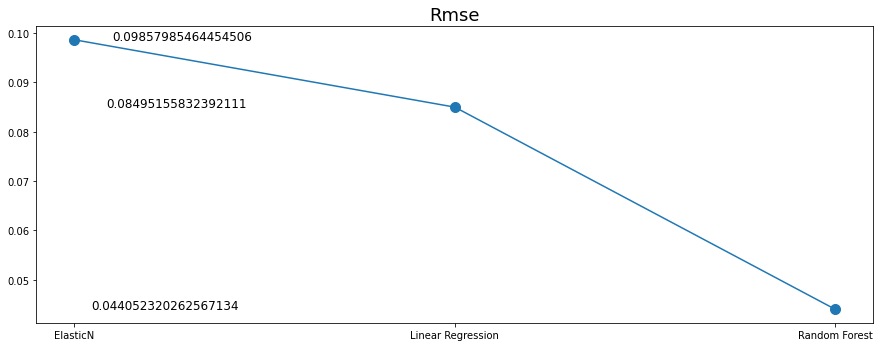

In [ ]:
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(211)

ax1.plot(r_all, marker="o", markersize=10, label='rmse')

for index in range(len(r_all)):
  ax1.text(r_all[0][index],r_all[0][index],r_all[0][index],size=12)

ax1.set_title("Rmse", fontsize=18)

### train via autogluon

In [ ]:
# !pip install autogluon

In [ ]:
import autogluon
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
train = pd.read_csv('train_new.csv')
test = pd.read_csv('test_new.csv')
train.drop("ID", axis = 1, inplace = True)
test.drop("ID", axis = 1, inplace = True)

In [ ]:
train_data = TabularDataset(train)
train_data['LotSize'] = np.log(train_data['LotSize'])
label = 'SalePrice'
predictor = TabularPredictor(label = label).fit(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20220531_045540\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220531_045540\"
AutoGluon Version:  0.4.1
Python Version:     3.9.7
Operating System:   Windows
Train Data Rows:    2051
Train Data Columns: 79
Label Column: SalePrice
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (849018.0, 32414.0, 216086.31058, 87545.40915)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2256.91 MB
	Train Data (Original)  Memory Usage: 5.69 MB (0.3% of available memory)

In [ ]:
test_data = TabularDataset(test)
test_data['LotSize'] = np.log(test_data['LotSize'])

pred_au = predictor.predict(test_data)
sub_au = pd.concat([pd.DataFrame(test_ID),pd.DataFrame(pred_au)],axis=1)
sub_au.columns = ['ID', 'SalePrice']
# sub = pd.DataFrame(test_ID)
# sub['SalePrice'] = preds.values
sub_au

,ID,SalePrice
0,2051,204105.718750
1,2052,360332.156250
2,2053,159092.156250
3,2054,199086.796875
4,2055,264775.312500
...,...,...
874,2925,359629.562500
875,2926,234641.062500
876,2927,213473.875000
877,2928,152105.328125


### Stacking

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0001, max_iter=15000,random_state=1))

In [ ]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9,max_iter=15000, random_state=3))

In [ ]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [ ]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [ ]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.3517 (0.0927)



In [ ]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.3241 (0.1039)



In [ ]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.3131 (0.1076)



In [ ]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.3258 (0.1005)



In [ ]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.3305 (0.0955)



In [ ]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.3206 (0.1019)



In [ ]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred

        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [ ]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, model_lgb),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
4 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-197-e58ff6dc0b70>", line 17, in fit
    instance.fit(X[train_index], y[train_index])
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/series.py", line 966, in __getitem__
    return self._get_with(key)
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/series.py", line 1001, in _

In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
stacked_averaged_models.fit(X_train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(X_train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(X_test.values))
print(rmsle(y_train, stacked_train_pred))

0.23715389325381733


In [ ]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.2947950193382127


In [ ]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.6191339411355774


In [ ]:
preds = stacked_pred
sub = pd.DataFrame({'ID':test_ID,'SalePrice':preds})

,ID,SalePrice
0,2051,212608.536099
1,2052,263879.196047
2,2053,176704.971649
3,2054,189170.763708
4,2055,243863.331277
...,...,...
874,2925,284157.503528
875,2926,220529.067214
876,2927,186837.832417
877,2928,175274.655360


In [ ]:
# sub.to_csv('sub.csv',index = False)

## Final Submission

In [ ]:
from google.colab import files
sub_au.to_csv('submission.csv',index = False)
files.download('submission.csv')